In [1]:
!pip install scikit-fuzzy

  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=16efc1e49906f9c1a3d9de535ee30347d8818c7bc1ac9f7ddad00d28c18ac19a
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\32\2c\a1\a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


### Import library

In [22]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

##### Implement with trimf
- `fuzz.trimf(x, [a, b, c])` 
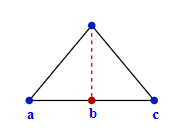

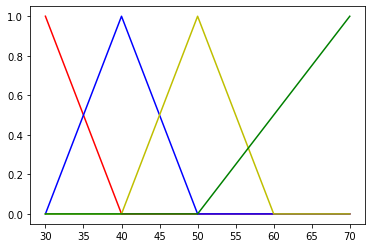

In [12]:
x = np.arange(30,71,1)
slow = fuzz.trimf(x,[30,30,40])
medium = fuzz.trimf(x,[30,40,50])
medium_fast = fuzz.trimf(x,[40,50,60])
full_speed = fuzz.trimf(x,[50,70,70])

plt.figure()
plt.plot(x, slow,'r',linewidth=1.5,label = 'Slow')
plt.plot(x, medium,'b',linewidth=1.5,label = 'Medium')
plt.plot(x, medium_fast,'y',linewidth=1.5,label = 'Medium fast')
plt.plot(x, full_speed,'g',linewidth=1.5,label = 'Full speed')

plt.show;

### Implement with trapmf
- `fuzz.trapmf(x, [a, b, c ,d])` 
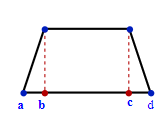

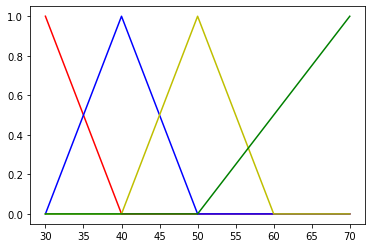

In [15]:
# Use trampf to replace trimf
x = np.arange(30,71,1)
slow = fuzz.trapmf(x,[30, 30, 30,40])
medium = fuzz.trapmf(x,[30, 40,40,50])
medium_falt = fuzz.trapmf(x,[40,50,50,60])
full_speed = fuzz.trapmf(x,[50,70,70,70])

plt.plot(x,slow,'r',linewidth=1.5,label = 'Slow')
plt.plot(x,medium,'b',linewidth=1.5,label = 'Medium')
plt.plot(x,medium_falt,'y',linewidth=1.5,label = 'Medium falt')
plt.plot(x,full_speed,'g',linewidth=1.5,label = 'Full speed')

plt.show;

### Implement with gaussmf
- `fuzz.gaussmf(x, mean, sigma)`
- **sigma** usually from **2** to **5**
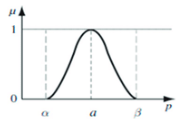

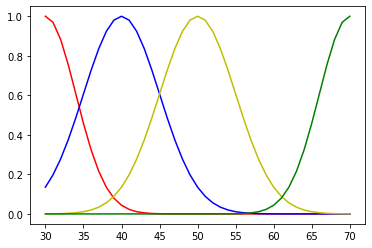

In [19]:
x = np.arange(30,71,1)
slow = fuzz.c(x,30,4) # Phương sai cỡ 4 - 5
medium = fuzz.gaussmf(x,40,5)
medium_falt = fuzz.gaussmf(x,50,5)
full_speed = fuzz.gaussmf(x,70,4)

plt.plot(x,slow,'r',linewidth=1.5,label = 'Slow')
plt.plot(x,medium,'b',linewidth=1.5,label = 'Medium')
plt.plot(x,medium_falt,'y',linewidth=1.5,label = 'Medium falt')
plt.plot(x,full_speed,'g',linewidth=1.5,label = 'Full speed')

plt.show;

## Practice: Calculating tips in the stores or restaurants
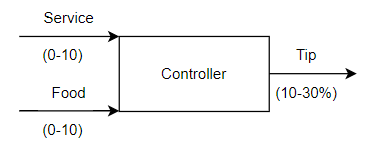

In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

import warnings
warnings.filterwarnings("ignore")

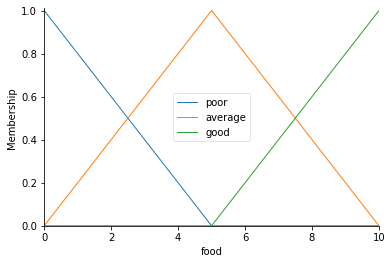

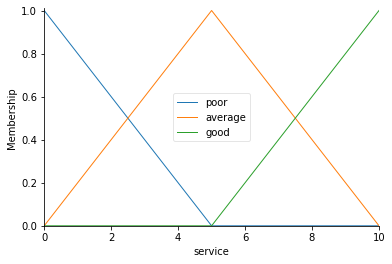

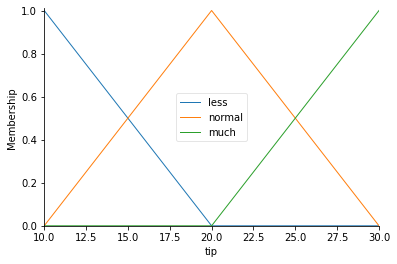

In [29]:
food = ctrl.Antecedent(np.arange(0,11,1),'food') # Set up input 1
service = ctrl.Antecedent(np.arange(0,11,1),'service')# Set up input 2
tip = ctrl.Consequent(np.arange(10,31,1),'tip') # Set up output

# Set up membership
food['poor']= fuzz.trimf(food.universe,[0,0,5])
food['average']= fuzz.trimf(food.universe,[0,5,10])
food['good']= fuzz.trimf(food.universe,[5,10,10])

service['poor']= fuzz.trimf(service.universe,[0,0,5])
service['average']= fuzz.trimf(service.universe,[0,5,10])
service['good']= fuzz.trimf(service.universe,[5,10,10])

tip['less']= fuzz.trimf(tip.universe,[10,10,20])
tip['normal']= fuzz.trimf(tip.universe,[10,20,30])
tip['much']= fuzz.trimf(tip.universe,[20,30,30])

food.view()
service.view()
tip.view()

### In ra giá trị nổi

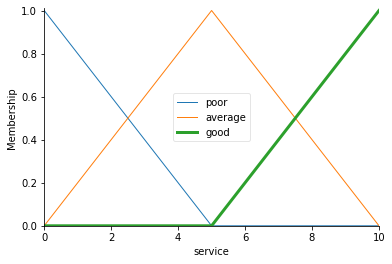

In [32]:
service['good'].view()

## Rules are built base on the table
| **Service\Food** | **Poor** | **Average** | **Good** |
|-------------------|----------|-------------|----------|
| **Poor**          | Less     | Less        | Less     |
| **Average**       | Less     | Normal      | Much     |
| **Good**          | Normal   | Much        | Much     |


### Set up Rules

In [30]:
rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['normal'])

rule4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['much'])

rule7 = ctrl.Rule(food['good'] & service['poor'], tip['less'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])


26.666666666666657


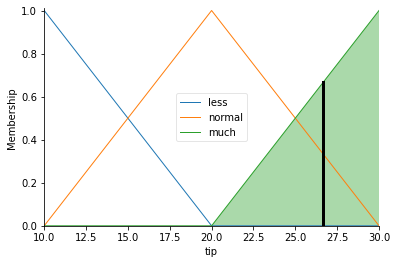

In [31]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food'] = 10
tipping.input['service'] = 10

tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)